# Business question #01
What customer behaviors actually move revenue?

In [1]:
from db.connection import q

In [2]:
sql = """
WITH trade_info AS (
	SELECT
		t.account_id,
		COUNT(*) AS total_count,
		SUM(t.commission) AS total_commission
	FROM "Trade" AS t
	WHERE 
		t.deleted_at IS NULL
	GROUP BY
		t.account_id
), asset_diversification AS (
	SELECT
		account_id,
		COUNT(*) AS traded_assets
		
	FROM (
		SELECT DISTINCT ON (t.account_id, t.asset_id) 
			t.account_id, 
			t.asset_id
		FROM "Trade" AS t
		WHERE t.deleted_at IS NULL
	) AS account_traded_assets
	
	GROUP BY account_id
)
SELECT 
	trade_info.total_count AS total_trades,
	trade_info.total_commission,
	asset_diversification.traded_assets,
	EXTRACT(EPOCH FROM (NOW() - acc.opened_at)) / 86400 AS lifetime_days
	
FROM "Account" AS acc

INNER JOIN trade_info
ON trade_info.account_id = acc.id

INNER JOIN asset_diversification
ON asset_diversification.account_id = acc.id

WHERE 
	acc.deleted_at IS NULL;
"""

In [3]:
df = q(sql)
df.head()

,total_trades,total_commission,traded_assets,lifetime_days
0,52,87.1228,10,199.23915
1,122,265.5463,12,813.23915
2,136,201.9093,12,386.23915
3,184,359.3902,12,1435.23915
4,490,658.7020,12,1141.23915


In [4]:
df.corr(method='spearman')

,total_trades,total_commission,traded_assets,lifetime_days
total_trades,1.000000,0.981543,0.891145,0.470930
total_commission,0.981543,1.000000,0.885540,0.525661
traded_assets,0.891145,0.885540,1.000000,0.397608
lifetime_days,0.470930,0.525661,0.397608,1.000000


<Axes: xlabel='total_commission', ylabel='total_trades'>

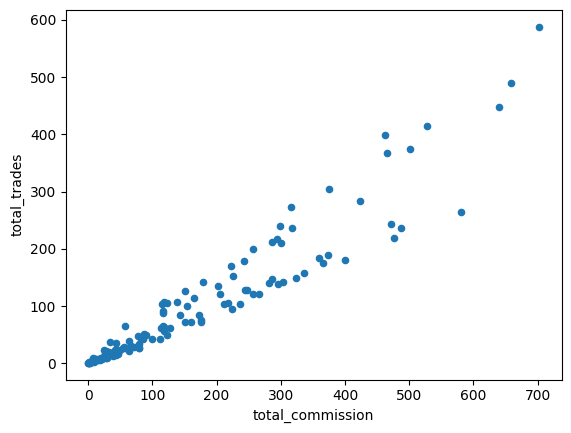

In [6]:
df.plot(kind='scatter', x='total_commission', y='total_trades')